PROJECT TITLE: BANK MARKETING CAMPAIGN SUBSCRIPTIONS

ABOUT THE PROJECT:
The Bank Marketing Campaign Subscriptions refer to a scenario where a bank conducts marketing campaigns to promote subscription to a particular financial product, often term deposits. Here's a breakdown of the background.
The Purpose of these campaigns is to prompt the clients to subscribe for a specific financial product of the bank (term deposit). After each call was conducted, the client had to inform the institution about their intention of either subscribing to the product (indicating a successful campaign) or not (unsucessful campaign).

The final output of this survey will be a binary result indicating if the client subscribed ('yes or 1') to the product or not ('no or 0').

Content

The predictor variables (features) contained in the dataset can be divided into the following five sections:

1. Variables that describing attributes related directly to the client:
a. age
b. job: type of job (e.g. 'admin', 'technician', 'unemployed', etc)
c. marital: marital status ('married', 'single', 'divorced', 'unknown')
d. education: level of education ('basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown','university.degree','illiterate')
e. default: if the client has credit in default ('no', 'unknown', 'yes')
f. housing: if the client has housing a loan ('no', 'unknown', 'yes')
g. loan: if the client has a personal loan ? ('no', 'unknown', 'yes')

2. Variables related to the last contact of the current campaign:
a. contact: type of communication ('telephone', 'cellular')
b. month: month of last contact
c. day_of_week: day of last contact
d. duration: call duration (in seconds)

3. Other variables related to the campaign(s):
a. campaign: number of contacts performed during this campaign and for this client
b. pdays: number of days passed by after the client was last contacted from a previous campaign
c. previous: number of contacts performed before this campaign and for this client
d. poutcome: outcome of previous marketing campaign ('nonexistent', 'failure', 'success')



My desire for this project is about the aims to showcase the unique features of Desire for Banking's offerings, emphasizing financial stability, competitive interest rates, and personalized customer service.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

In [3]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [29]:
data.isnull().sum().sort_values(ascending = False).head(20)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

In [4]:
data.dropna(inplace = True)
print(f'dataframe rows: {data.shape[0]} \ndataframe columns: {data.shape[1]} \n')

cats = data.select_dtypes(include = ['object', 'category'])
nums = data.select_dtypes(include = 'number')

display(cats.head(3))
display(nums.head(3))

dataframe rows: 11162 
dataframe columns: 17 



,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [6]:
def cleaner(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum()/len(dataframe) * 100) > 30:
            dataframe.drop(i, inplace = True, axis =1)

        elif dataframe[i].dtypes != 'O':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

        else:
             dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)

    print(dataframe.isnull().sum().sort_values(ascending = False).head())
    print(f'\n\t\t\t\t\t\t\t\tDATAFRAME IS CLEANED')
    return dataframe

cleaner(data)

age         0
day         0
poutcome    0
previous    0
pdays       0
dtype: int64

								DATAFRAME IS CLEANED


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [37]:
# Transform the dataset to a Machine-Readeable Language

frame = data.copy()

from sklearn.preprocessing import LabelEncoder
def transformer(dataframe):
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    scaler = StandardScaler()
    encoder = LabelEncoder()

    for i in dataframe.columns:
        if dataframe[i].dtypes != 'O':
            dataframe[i] = scaler.fit_transform(dataframe[[i]])
        else:
            dataframe[i] = encoder.fit_transform(dataframe[i])
    return dataframe

y = frame.deposit
x = frame.drop(['deposit'], axis = 1)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

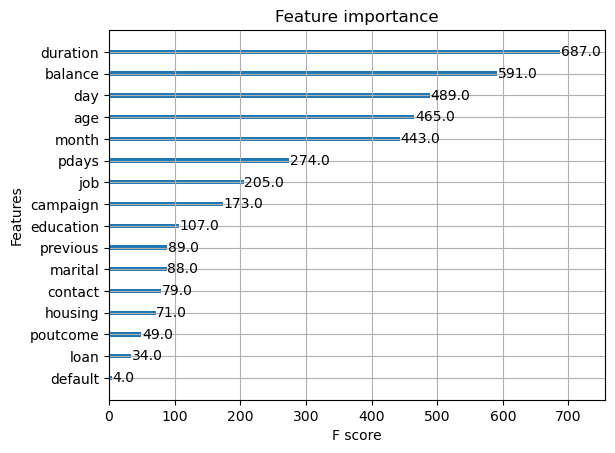

In [8]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [36]:
sel_features = ['duration', 'balance', 'day', 'age', 'month', 'pdays', 'job', 'campaign', 'education']

new_frame = x[sel_features] #................................................... Turn the selected features to a dataframe
new_frame.head() #.............................................................. Display the selected features

,duration,balance,day,age,month,pdays,job,campaign,education
0,1.930226,0.252525,-1.265746,1.491505,8,-0.481184,0,-0.554168,1
1,3.154612,-0.459974,-1.265746,1.239676,8,-0.481184,0,-0.554168,1
2,2.929901,-0.080160,-1.265746,-0.019470,8,-0.481184,9,-0.554168,1
3,0.596366,0.293762,-1.265746,1.155733,8,-0.481184,7,-0.554168,1
4,0.867171,-0.416876,-1.265746,1.071790,8,-0.481184,0,-0.186785,2


MODELLING

In [21]:
# split into train and test

x = new_frame
y = data['deposit']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 8, stratify = y)

<Axes: xlabel='deposit', ylabel='count'>

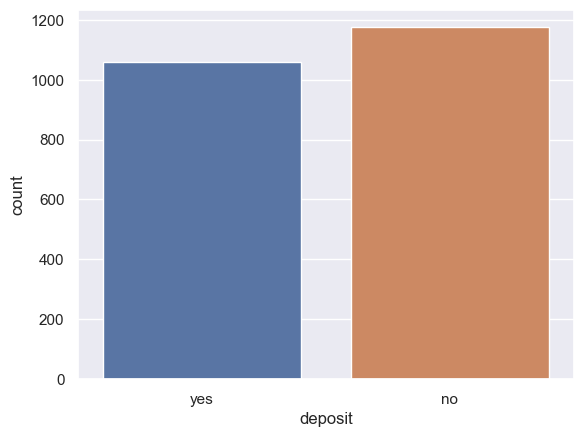

In [33]:
sns.countplot(x = ytest)

In [22]:
xtrain.head()

,duration,balance,day,age,month,pdays,job,campaign,education
7565,-0.014387,-0.350215,-0.553187,-0.271300,1,-0.481184,4,0.547981,1
8509,-0.593449,-0.407265,-0.078148,-0.691015,0,-0.481184,1,-0.554168,1
8115,-0.590568,0.925337,1.346969,-1.110730,8,-0.481184,9,0.180598,2
7823,-0.535831,-0.473926,1.703248,-0.523129,5,-0.481184,0,1.282747,1
7219,-0.553116,-0.365718,-0.434427,-0.942844,1,-0.481184,4,0.180598,2


              precision    recall  f1-score   support

          no       0.83      0.73      0.78      5320
         yes       0.66      0.78      0.71      3609

    accuracy                           0.75      8929
   macro avg       0.74      0.75      0.75      8929
weighted avg       0.76      0.75      0.75      8929



<Axes: >

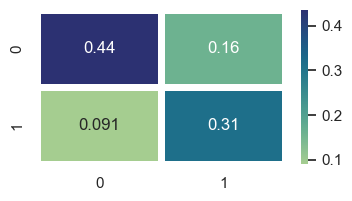

In [26]:
# Modelling
# Initialize the Logistic Regression
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


log_reg = LogisticRegression() # ............................................... Import the modelling Algorithm
log_reg.fit(xtrain, ytrain) # .................................................. Fit the algorithm on the data to get a model
cross_validation = log_reg.predict(xtrain) # ................................... Cross Validate the train to identify underfitting or overfitting
print(classification_report(cross_validation, ytrain)) # ....................... Use the classification report metric to get the model performance

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

          no       0.83      0.73      0.77      1333
         yes       0.66      0.77      0.71       900

    accuracy                           0.75      2233
   macro avg       0.74      0.75      0.74      2233
weighted avg       0.76      0.75      0.75      2233



<Axes: >

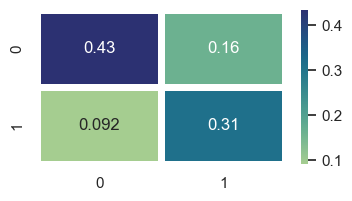

In [27]:
test_predict = log_reg.predict(xtest)
print(classification_report(test_predict, ytest))

revealer = confusion_matrix(test_predict, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [28]:
pickle.dump(log_reg,open('BankMkt.pkl','wb'))
